# How to 
* perform basic analysis using Pandas package

Quick recommendation: whenever you have any questions, take a look on this [Basic Python Tutorial](https://www.tutorialspoint.com/python/index.htm)

## Importing libraries and packages to import csv files

In [1]:
# Pandas
import pandas as pd 
# It means that pandas pack was imported and renamed as pd

#### One of the first things I always like to do in the beginning of any notebook is:
* to change the current working directory to the folder where I'm working

In [2]:
# "os" stands for Operating System
import os
print(os.getcwd())
# "getcwd" it's an acronym for: "get current working directory"

/home/broilo/Documents/GitHub/HowTo/Analysis_with_Pandas


In [83]:
# Defining the path, i.e. the direction to where we're working
path = '/home/broilo/Documents/GitHub/HowTo/Analysis_with_Pandas'
os.chdir(path)
# "chdir" you can read it as: "change directory to"

### Let's import a csv file from our path
* by means of pandas pack
* you can also find it in the [GitHub](https://raw.githubusercontent.com/StephanieStallworth/Exploratory_Data_Analysis_Visualization_Python/master/Movie-Ratings.csv), to load it use the following line
    - url = 'WriteTheLinkHere'
    - data = pd.read_csv(url)

In [84]:
data = pd.read_csv('Movie-Ratings.csv')

### Reading the dataframe with the head() method:
* it returns the first 5 rows
* you can use it as: head(WriteAnyNumberHere), e.g. data.head(), data.head(3), data.head(100) ...

In [85]:
data.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


### Reading the dataframe with the tail() method:
* it returns the last 5 rows
* it follows the same as the head()

In [86]:
data.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


### Changing the name of the columns
#### Why? Because it's easy to work with dataframes which the columns are named without spaces and special characters

* I'm going to show you here two ways of changing the columns names
* I'll just rename the dataframe so that we can see both methods applied

#### First method

In [87]:
data_FM = pd.read_csv('Movie-Ratings.csv') # FM stands for First Method
data_FM.head(0)

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release


In [88]:
data_FM.columns = ['Film', 'Genre', 'Critic_Rating', 'Audience_Rating', 'Budget_Millions', 'Year_Release']

In [89]:
data_FM.head(0)

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release


##### What have I done here? I changed only the names of the 3rd, 4th, 5th and 6th columns. Let me show you the pros and cons of this first method
* Pros: very direct and simple to apply
* Cons: all the columns must be shown inside the [ ], even those ones that the name won't change

In [90]:
data_FM = pd.read_csv('Movie-Ratings.csv')
data_FM.columns = ['Critic_Rating', 'Audience_Rating', 'Budget_Millions', 'Year_Release']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements

#### See the error shown:
*ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements*

It means that I didn't specify all the columns!

#### Second Method

In [91]:
data_SM = pd.read_csv('Movie-Ratings.csv') # SM stands for Second Method
data_SM.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


#### I'll jump right to the pros a cons:
* Pros: there's no need to specify all the columns
* Cons: it's a little tricky

In [92]:
data_SM.rename(columns = {'Rotten Tomatoes Ratings %' : 'Critic_Rating', 
                         'Audience Ratings %' : 'Audience_Rating', 
                         'Budget (million $)' : 'Budget_Millions', 
                         'Year of release' : 'Year_Release'}, 
              inplace = True)

In [93]:
data_SM.head(0)

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release


### It doesn't matter which method to use in this example since there aren't much columns, but in bigger dataframes I prefer to use the second method. But for the moment, let's go with the first one

In [94]:
data.columns = ['Film', 'Genre', 'Critic_Rating', 'Audience_Rating', 'Budget_Millions', 'Year_Release']
data.head()

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


## Information Analysis

### The info() method returns:
* how much non-null values the dataframe contains
* the values-type in each column
* the total memory in use

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   Critic_Rating    559 non-null    int64 
 3   Audience_Rating  559 non-null    int64 
 4   Budget_Millions  559 non-null    int64 
 5   Year_Release     559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


### Changing the data-type

In [96]:
data.Critic_Rating = data.Critic_Rating.astype('int8')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   Critic_Rating    559 non-null    int8  
 3   Audience_Rating  559 non-null    int64 
 4   Budget_Millions  559 non-null    int64 
 5   Year_Release     559 non-null    int64 
dtypes: int64(3), int8(1), object(2)
memory usage: 22.5+ KB


### The describe() method returns:
* statistical info about numerical columns

In [98]:
data.describe()

,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


#### sometimes I prefer to read it like this:

In [99]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Critic_Rating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
Audience_Rating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
Budget_Millions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0
Year_Release,559.0,2009.152057,1.362632,2007.0,2008.0,2009.0,2010.0,2011.0


#### Meaning:
* count: gives the total number of non-null values per column
* mean: gives the mean value in each column
* std: gives the standard deviation
* min: gives the minimal value in each column
* max: gives the maximal value in each column
* 25%, 50%, 75%: are the [quartiles](https://en.wikipedia.org/wiki/Quartile) of the data. 

The first quartile (Q1) is defined as the middle number between the smallest number and the median of the data set. It is also known as the lower quartile or the 25th empirical quartile and it marks where 25% of the data is below or to the left of it (if data is ordered on a timeline from smallest to largest)

The second quartile (Q2) is the median of a data set and 50% of the data lies below this point

The third quartile (Q3) is the middle value between the median and the highest value of the data set

* Notice that: statiscal information over the Year-column means nothing here

## Correlation among numerical columns

In [100]:
data.corr()

,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
Critic_Rating,1.000000,0.654803,0.014071,0.050674
Audience_Rating,0.654803,1.000000,0.191108,-0.060985
Budget_Millions,0.014071,0.191108,1.000000,-0.019622
Year_Release,0.050674,-0.060985,-0.019622,1.000000


### Let's create a correlation matrix plot
* What is it? A correlation matrix is a table showing correlation coefficients between variables where each cell in the table shows the correlation between two variables. In a few words, it says how much a variable affects or is affected by another variable

#### First we need to import a library for creating images: 
* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)

In [113]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
sns.set(color_codes = True, font_scale = 1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


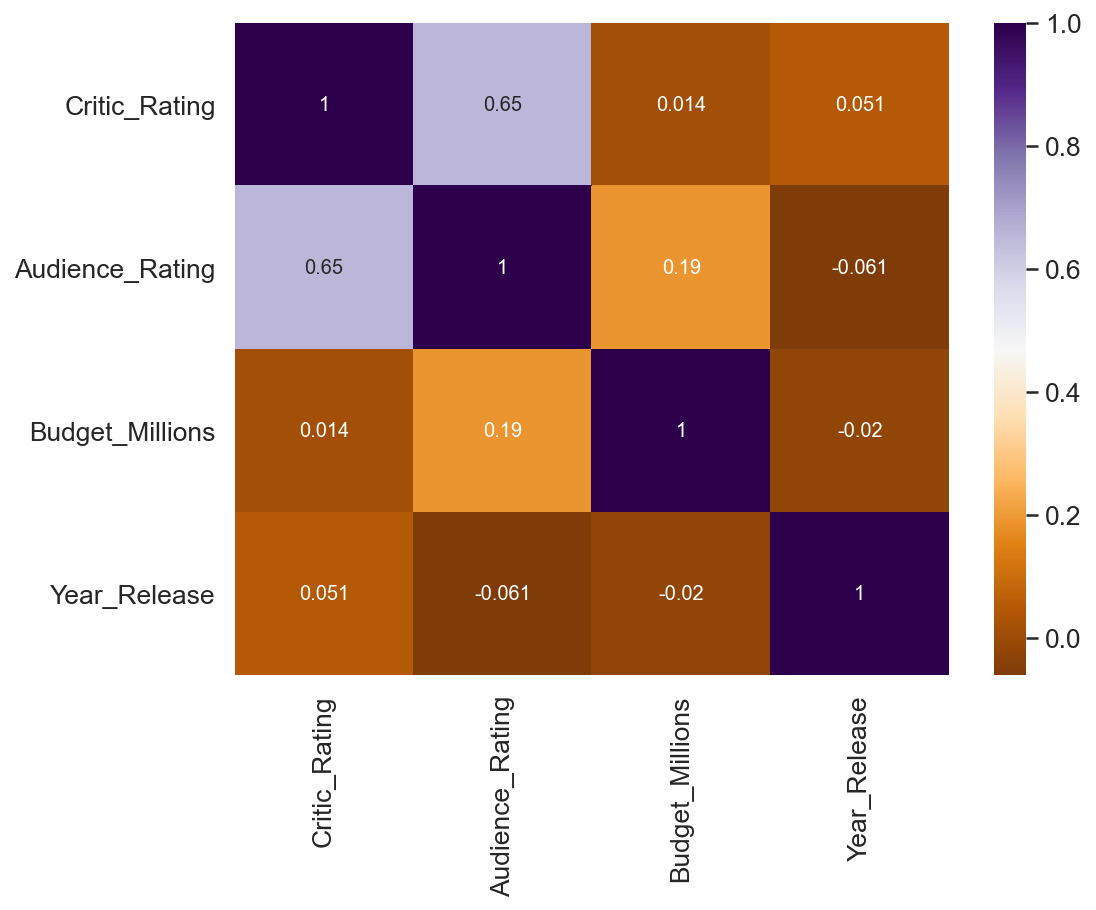

In [109]:
plt.figure(2, figsize = (8, 6))
sns.heatmap(data.corr(), cmap = 'PuOr', annot = True)
plt.show()

#### Just for completeness:
* I found this [Medium](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec) article where it is discussed a more reliable way to present a Correlation Matrix, as a Heat Map

In [26]:
#!pip install heatmapz

In [27]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

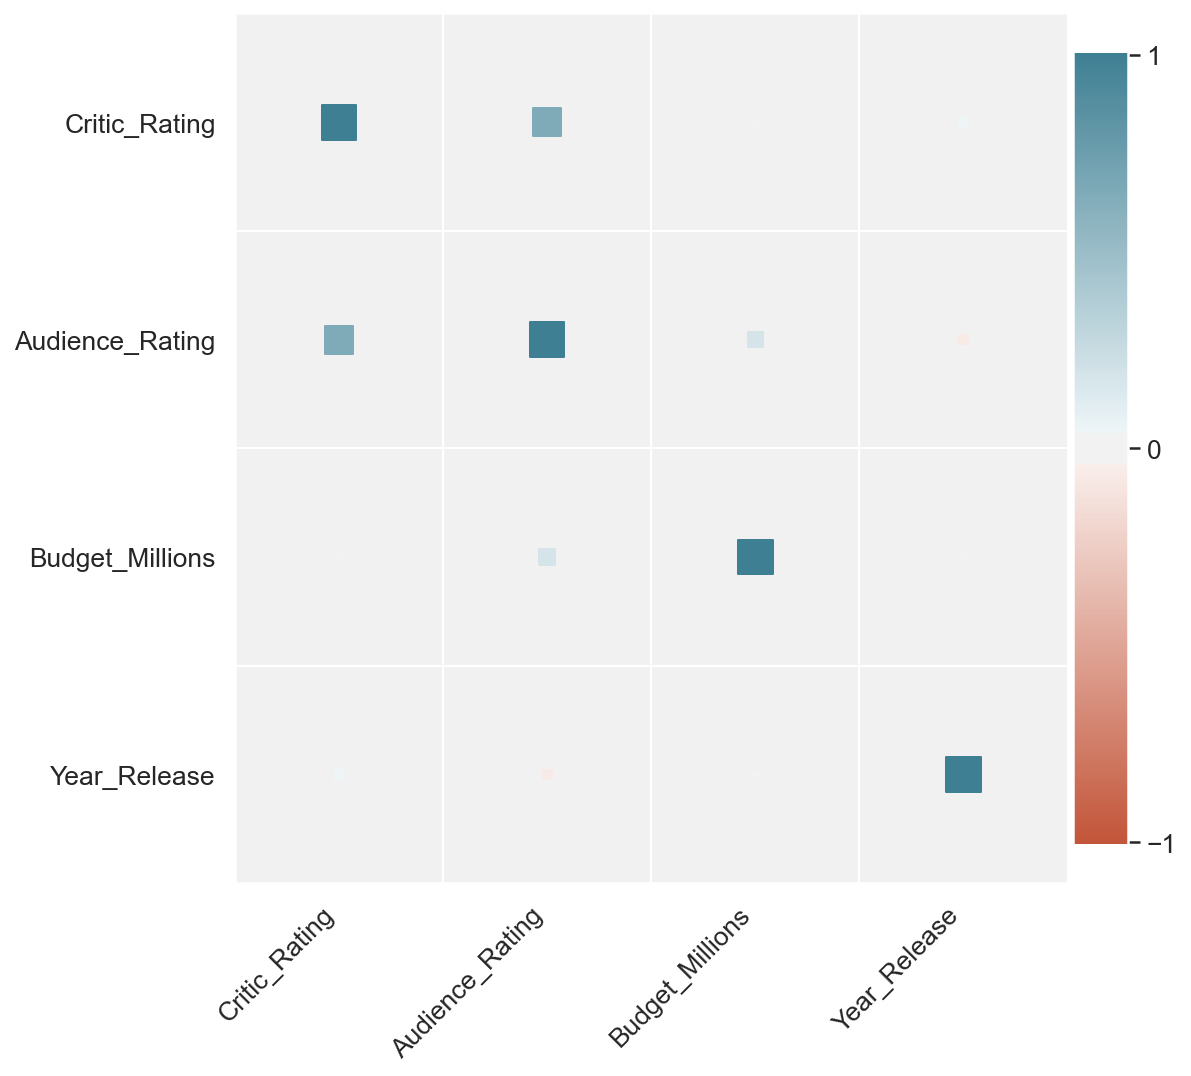

In [28]:
plt.figure(figsize = (8, 8))
corrplot(data.corr(), size_scale = 300);

## Analysis

In [29]:
data.head()

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


### Let's take a look on the Film column

In [30]:
data['Film']

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: object

#### Which can be viewed also as

In [31]:
data.Film

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: object

### Let's see the first 15 rows from the Film and Genre columns

In [32]:
data[['Film', 'Genre']].head(15)

,Film,Genre
0,(500) Days of Summer,Comedy
1,"10,000 B.C.",Adventure
2,12 Rounds,Action
3,127 Hours,Adventure
4,17 Again,Comedy
5,2012,Action
6,27 Dresses,Comedy
7,30 Days of Night,Horror
8,30 Minutes or Less,Comedy
9,50/50,Comedy


### Unique values of Genre

In [33]:
data.Genre.unique()

array(['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance',
       'Thriller'], dtype=object)

### The number of unique Genre

In [34]:
data.Genre.value_counts()

Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: Genre, dtype: int64

#### It can be shown in a dataframe kind

In [35]:
num_Genres = pd.DataFrame(data.Genre.value_counts())
num_Genres = num_Genres.reset_index()
num_Genres.columns = ['Genre', 'Total_Number']
num_Genres

,Genre,Total_Number
0,Comedy,172
1,Action,154
2,Drama,101
3,Horror,49
4,Thriller,36
5,Adventure,29
6,Romance,18


### The number of films per year

In [36]:
count_movies = pd.DataFrame(data.Year_Release.value_counts())
count_movies = count_movies.reset_index()
count_movies.columns = ['Year', 'Total_Films']
count_movies

,Year,Total_Films
0,2011,123
1,2008,122
2,2010,119
3,2009,116
4,2007,79


## Charts

#### Total number of movies per genre

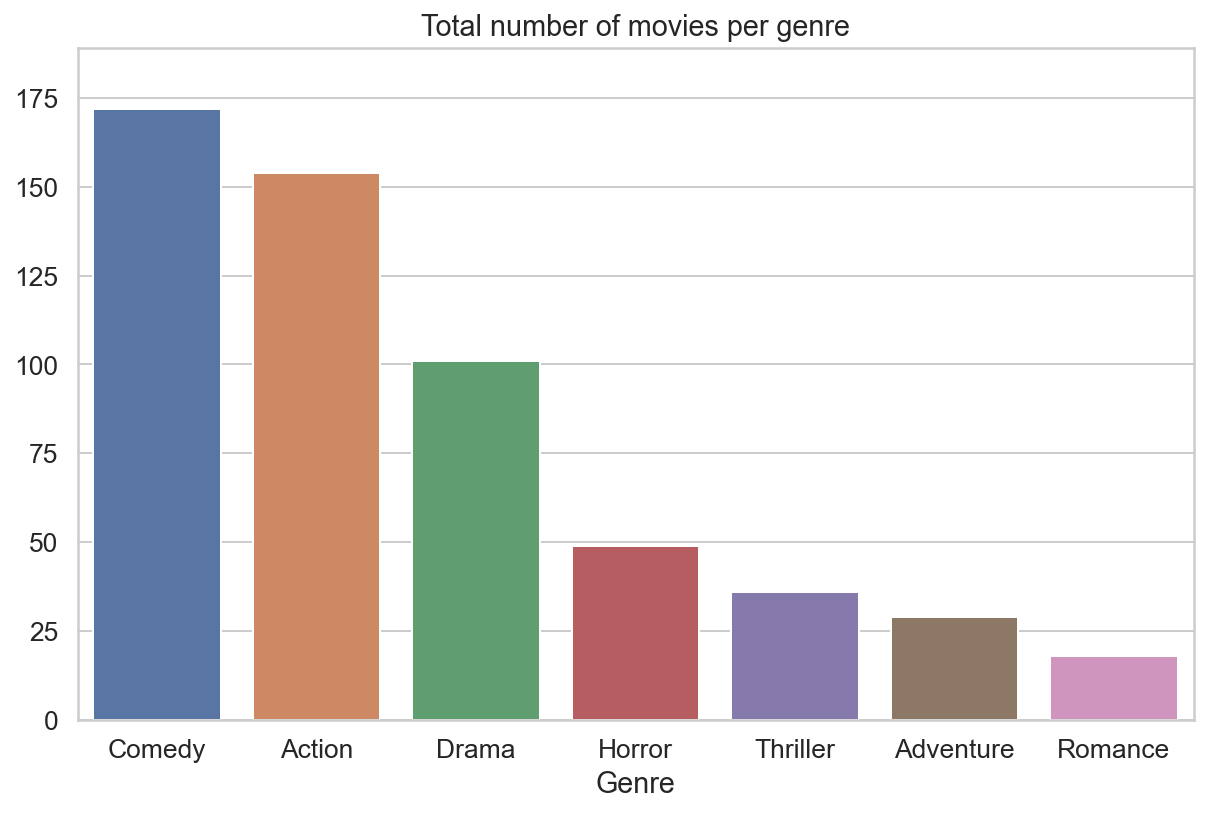

In [37]:
sns.set_style('whitegrid')
plt.figure(1, figsize = (10, 10/1.6180))
ax = sns.barplot(x = 'Genre', y = 'Total_Number', data = num_Genres)
ax.set(xlabel = 'Genre', ylabel = '', title = 'Total number of movies per genre', \
       ylim = (0, max(num_Genres['Total_Number'])* 1.10))
#plt.savefig('films_genre.png')
plt.show()

#### Number of movies per year

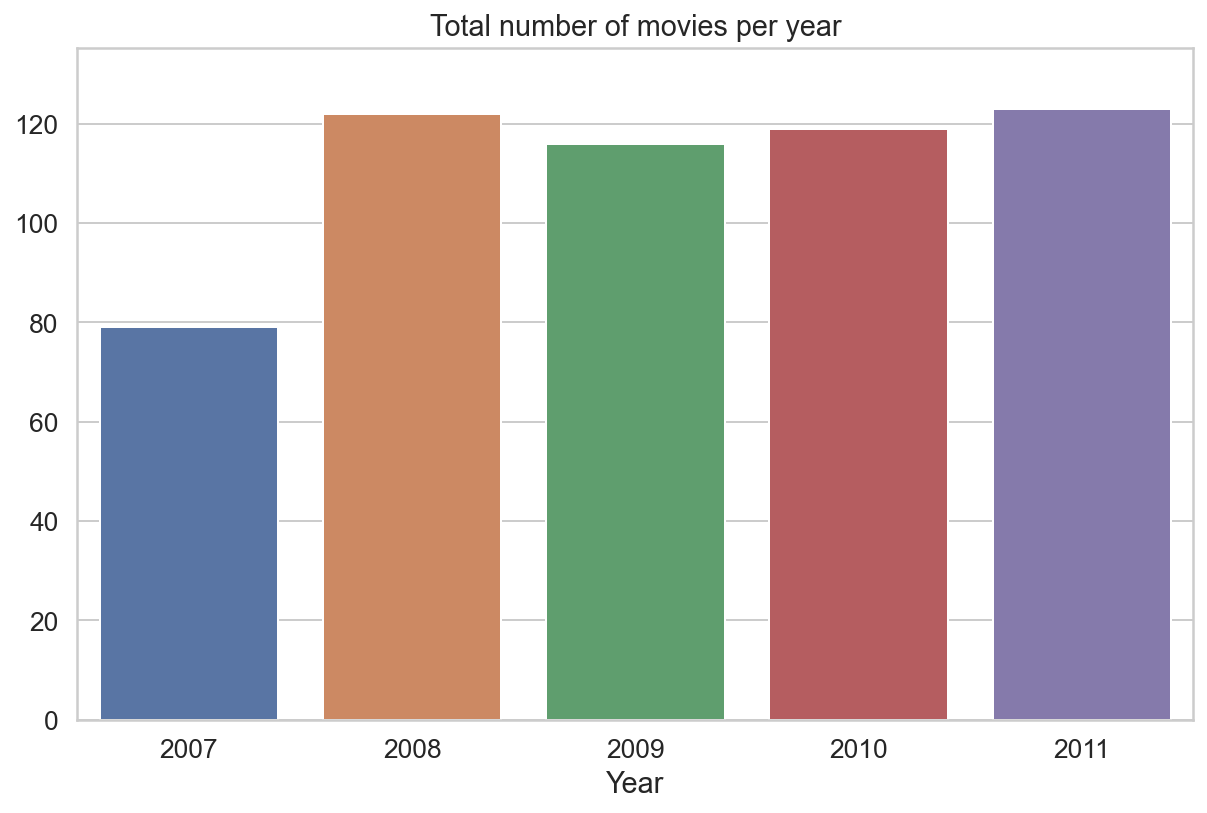

In [38]:
sns.set_style('whitegrid')
plt.figure(1, figsize = (10, 10/1.6180))
ax = sns.barplot(x = 'Year', y = 'Total_Films', data = count_movies)
ax.set(xlabel = 'Year', ylabel = '', title = 'Total number of movies per year', \
       ylim = (0, max(count_movies['Total_Films'])* 1.10))
#plt.savefig('films_year.png')
plt.show()

#### Histogram for budget of movies hued by genre

In [39]:
data.Genre = data.Genre.astype('category')
data.Year_Release = data.Year_Release.astype('category')

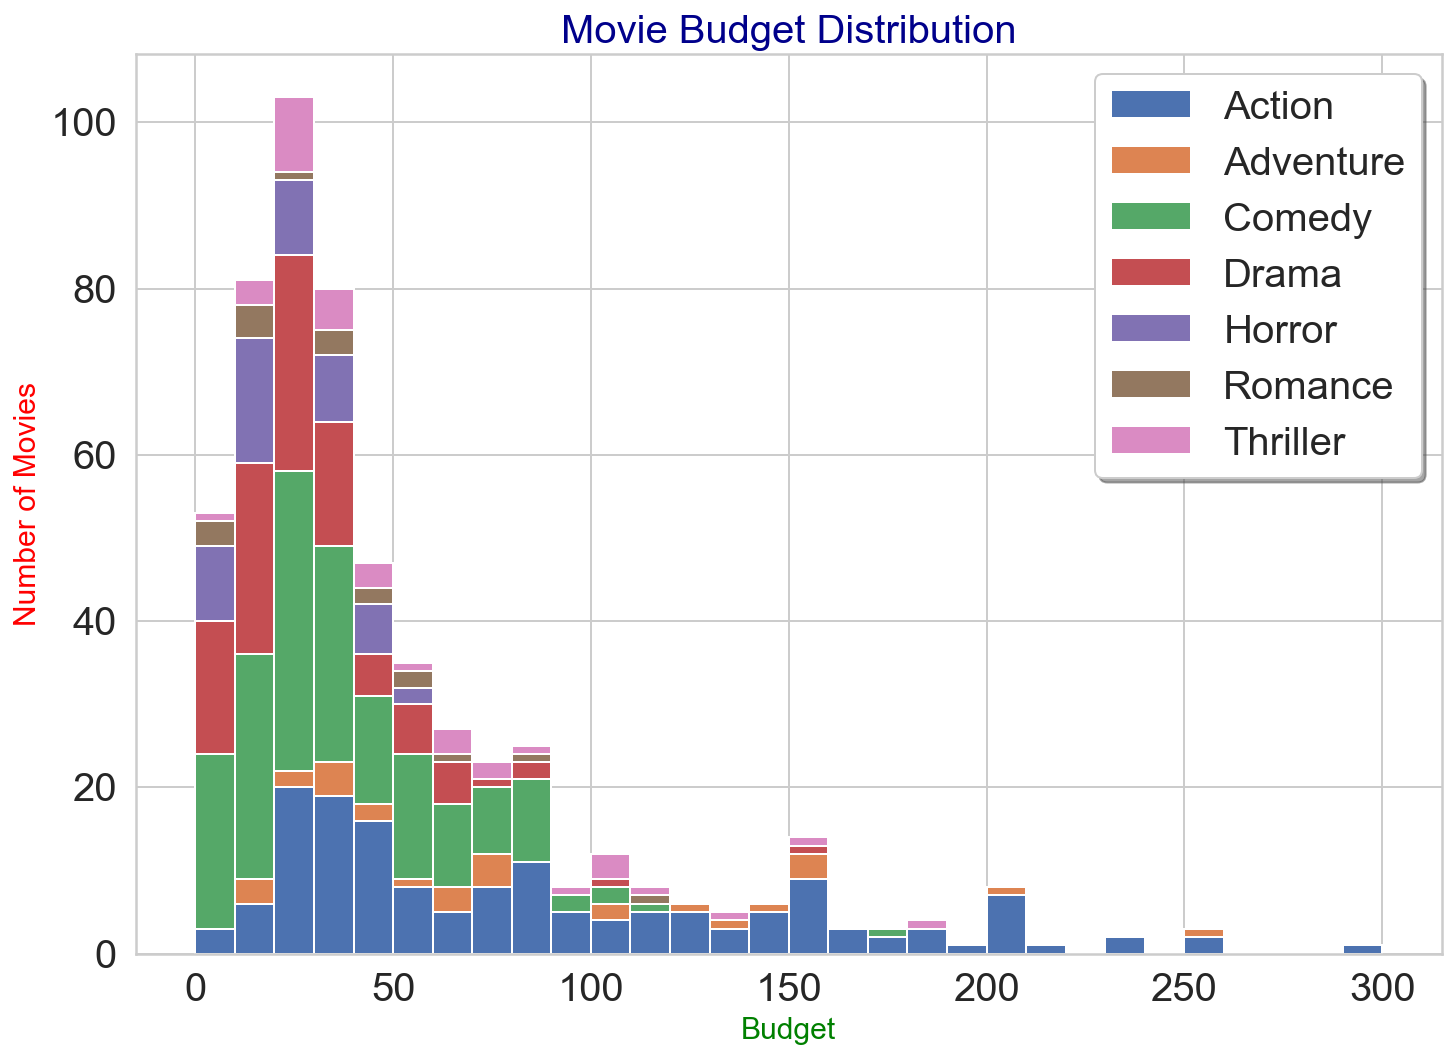

In [40]:
list1 = []
mylabels = []
for gen in data.Genre.cat.categories:
    list1.append(data[data.Genre == gen].Budget_Millions)
    mylabels.append(gen)
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
h = plt.hist(list1, bins = 30, stacked = True, rwidth = 1, label = mylabels)
plt.title('Movie Budget Distribution', fontsize = 20, \
         color = "DarkBlue", fontname = 'Arial')
plt.ylabel('Number of Movies', fontsize = 15, color = 'Red')
plt.xlabel('Budget', fontsize = 15, color = 'Green')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(frameon = True, fancybox = True, shadow = True, \
           framealpha = 1, prop = {'size': 20})
plt.show()

### Dispersion plots

In [41]:
sns.set_style('darkgrid')

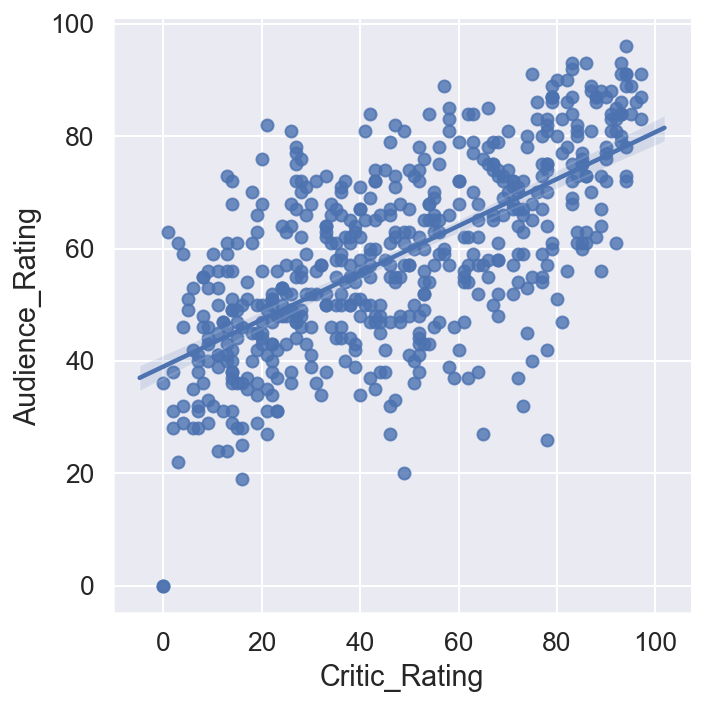

In [42]:
vis1 = sns.lmplot(data = data, x = 'Critic_Rating', y = 'Audience_Rating', \
                 fit_reg = True, \
                 size = 5, aspect = 1)

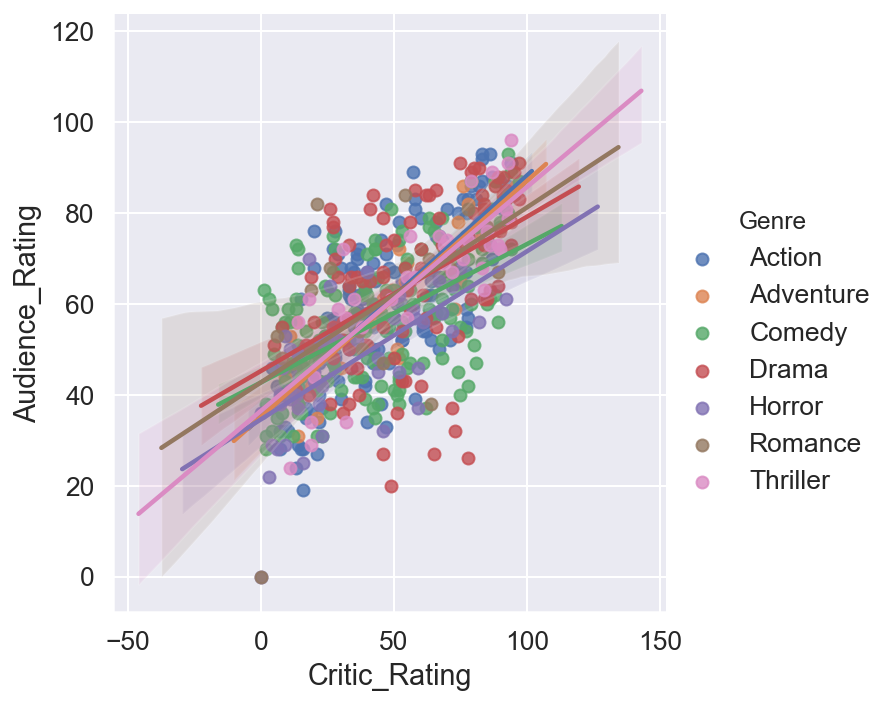

In [43]:
vis2 = sns.lmplot(data = data, x = 'Critic_Rating', y = 'Audience_Rating', \
                 fit_reg = True, hue = 'Genre', \
                 size = 5, aspect = 1)

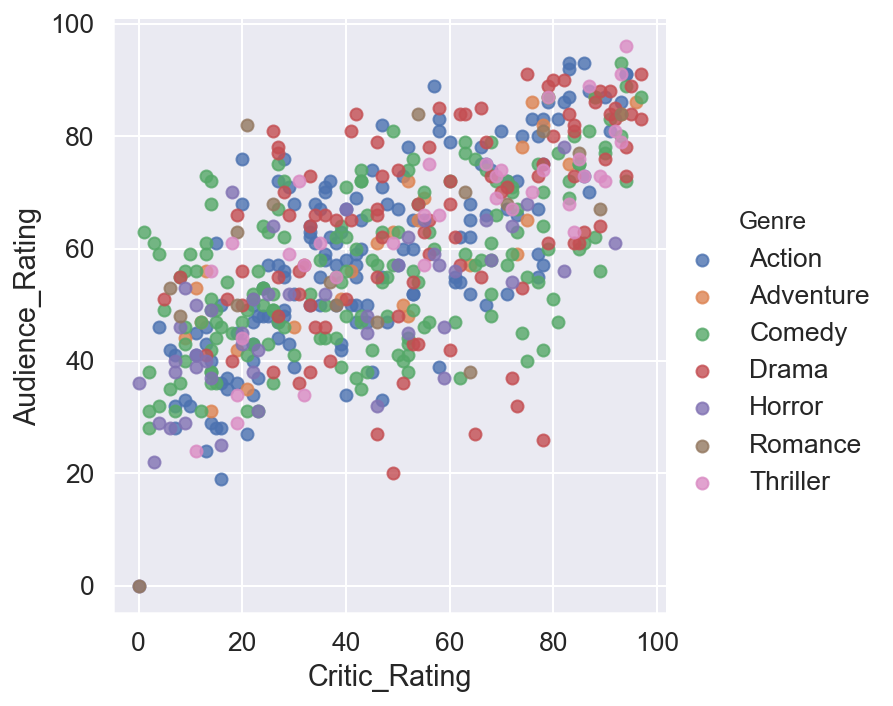

In [44]:
vis3 = sns.lmplot(data = data, x = 'Critic_Rating', y = 'Audience_Rating', \
                 fit_reg = False, hue = 'Genre', \
                 size = 5, aspect = 1)

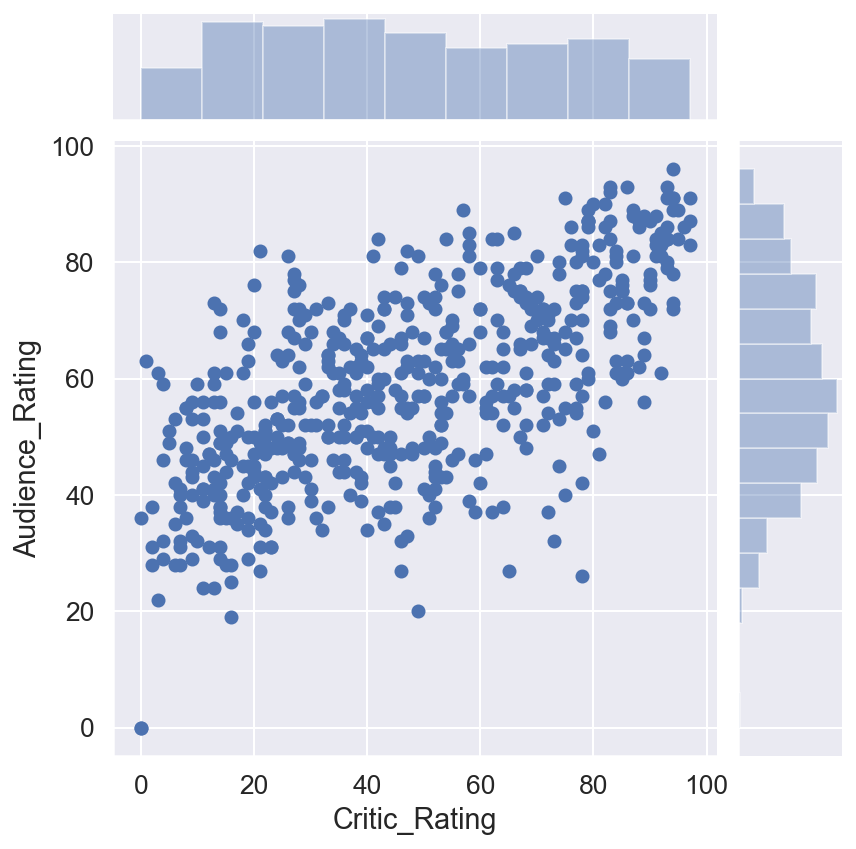

In [45]:
vis4 = sns.jointplot(data = data, x = 'Critic_Rating', y = 'Audience_Rating')

### Levels curves

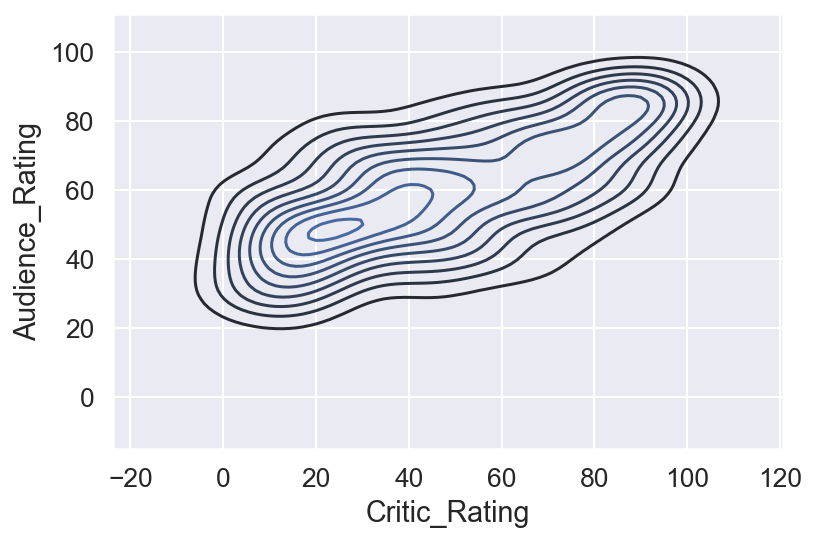

In [46]:
vis5 = sns.kdeplot(data.Critic_Rating, data.Audience_Rating)

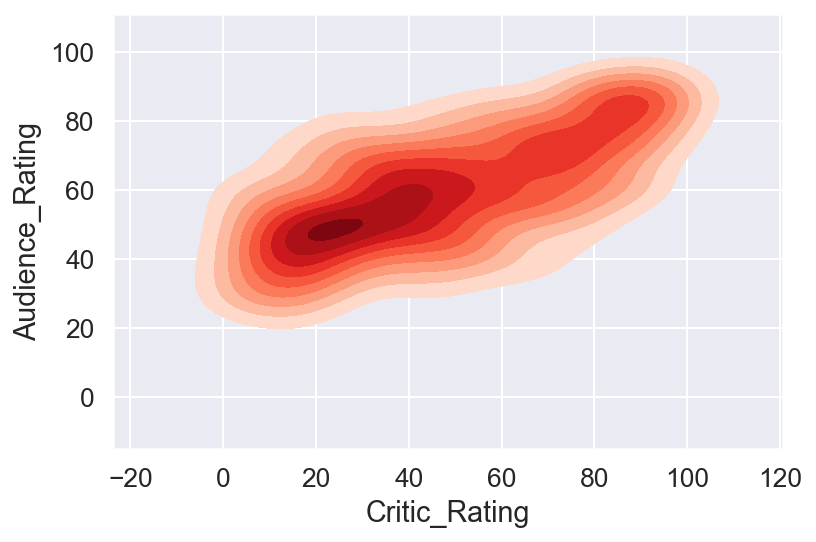

In [47]:
vis6 = sns.kdeplot(data.Critic_Rating, data.Audience_Rating, \
                shade = True, shade_lowest = False, cmap = 'Reds')

#### To create a sharper and well defined level curves

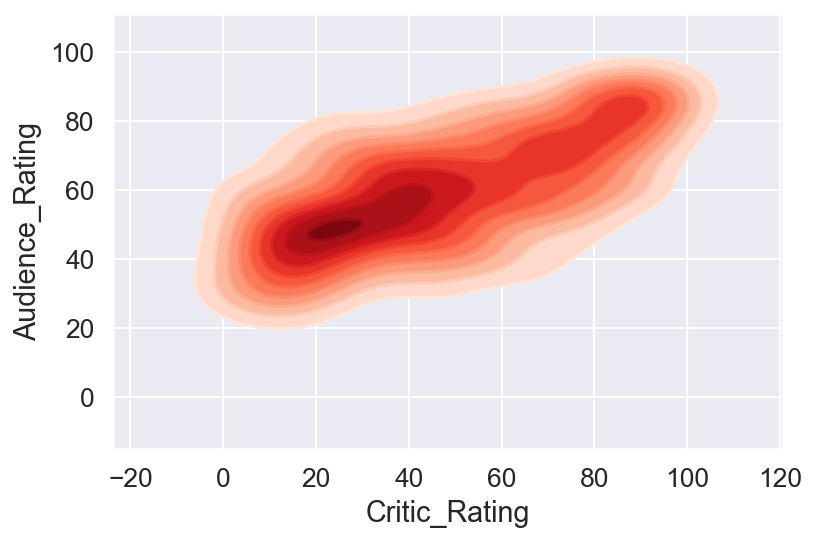

In [48]:
vis7 = sns.kdeplot(data.Critic_Rating, data.Audience_Rating, \
                shade = True, shade_lowest = False, cmap = 'Reds') 
vis7b = sns.kdeplot(data.Critic_Rating, data.Audience_Rating, \
                 cmap = 'Reds')

### Checking for outliers
* In statistics, an [outlier](https://en.wikipedia.org/wiki/Outlier) is a data point that differs significantly from other observations.

#### Box plots

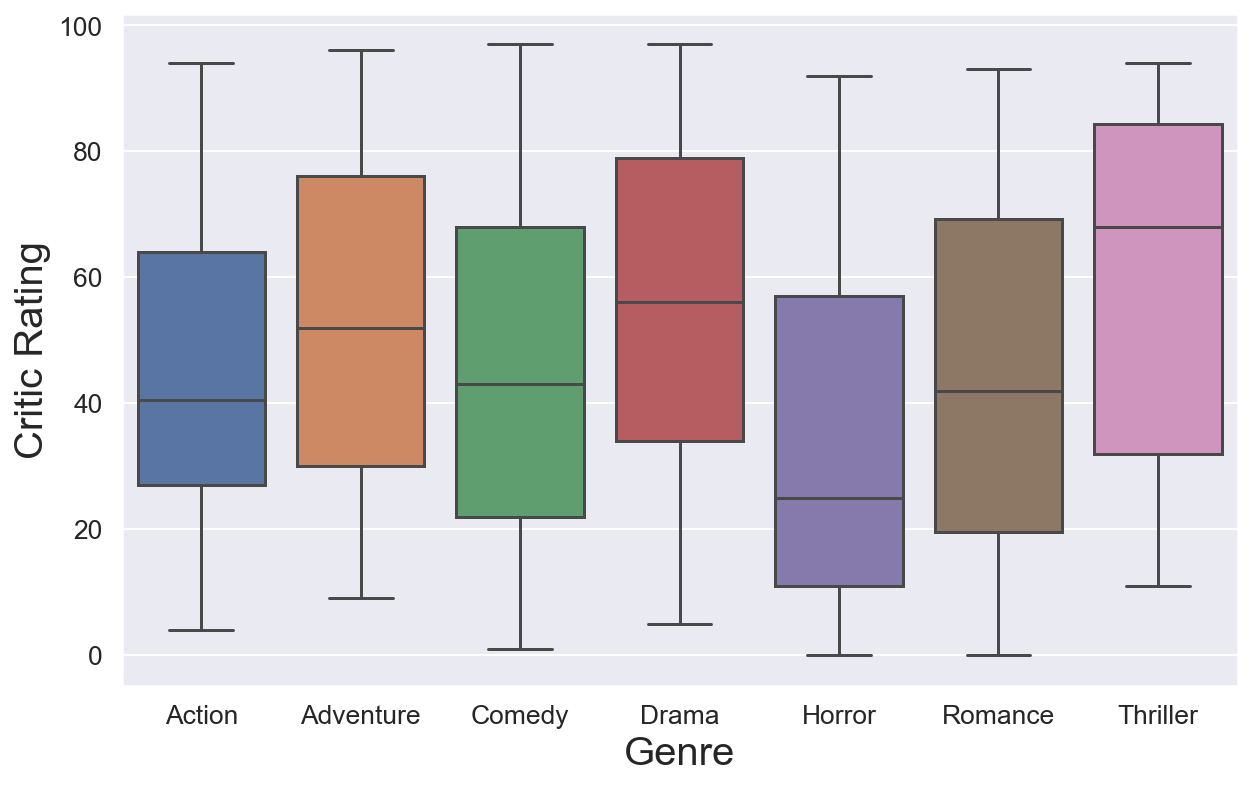

In [49]:
plt.figure(1, figsize = (10, 10/1.6180))
box1 = sns.boxplot(data = data, x = 'Genre', y = 'Critic_Rating')
plt.ylabel('Critic Rating', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.show()

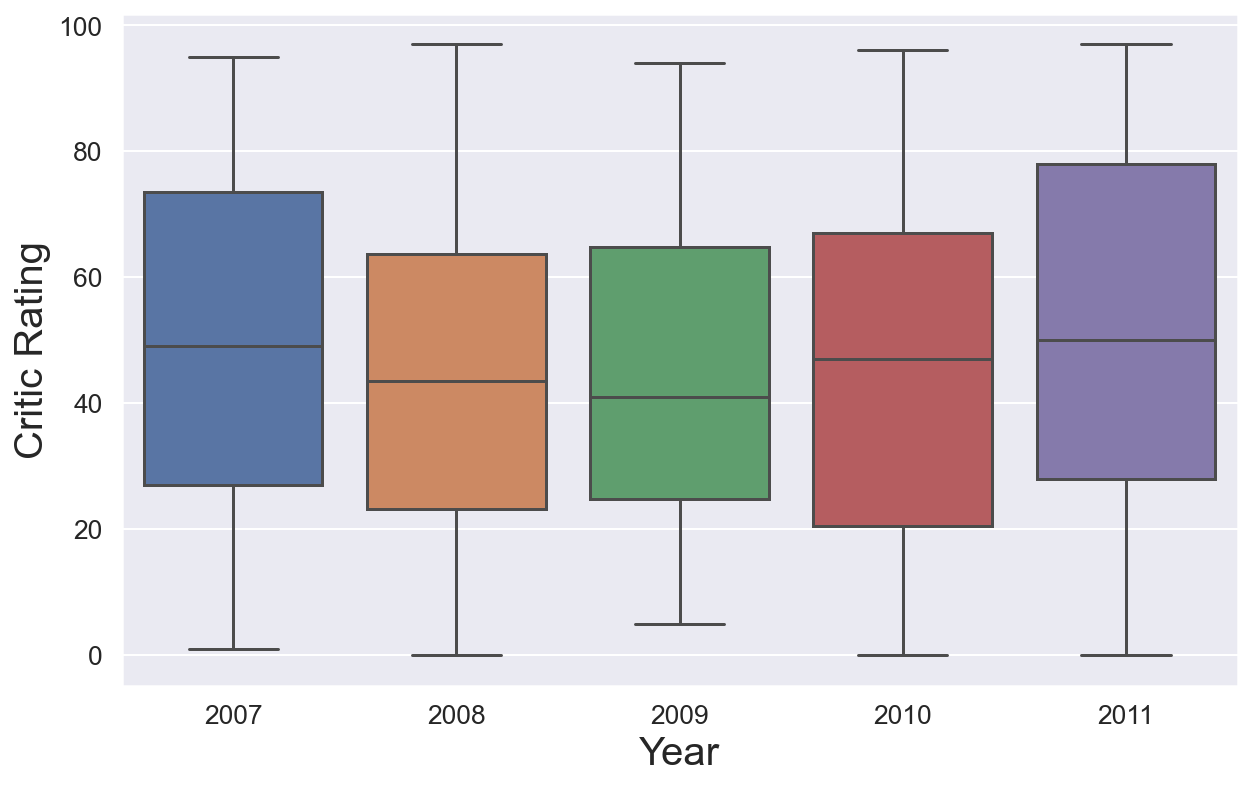

In [50]:
plt.figure(1, figsize = (10, 10/1.6180))
box2 = sns.boxplot(data = data, x = 'Year_Release', y = 'Critic_Rating')
plt.ylabel('Critic Rating', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

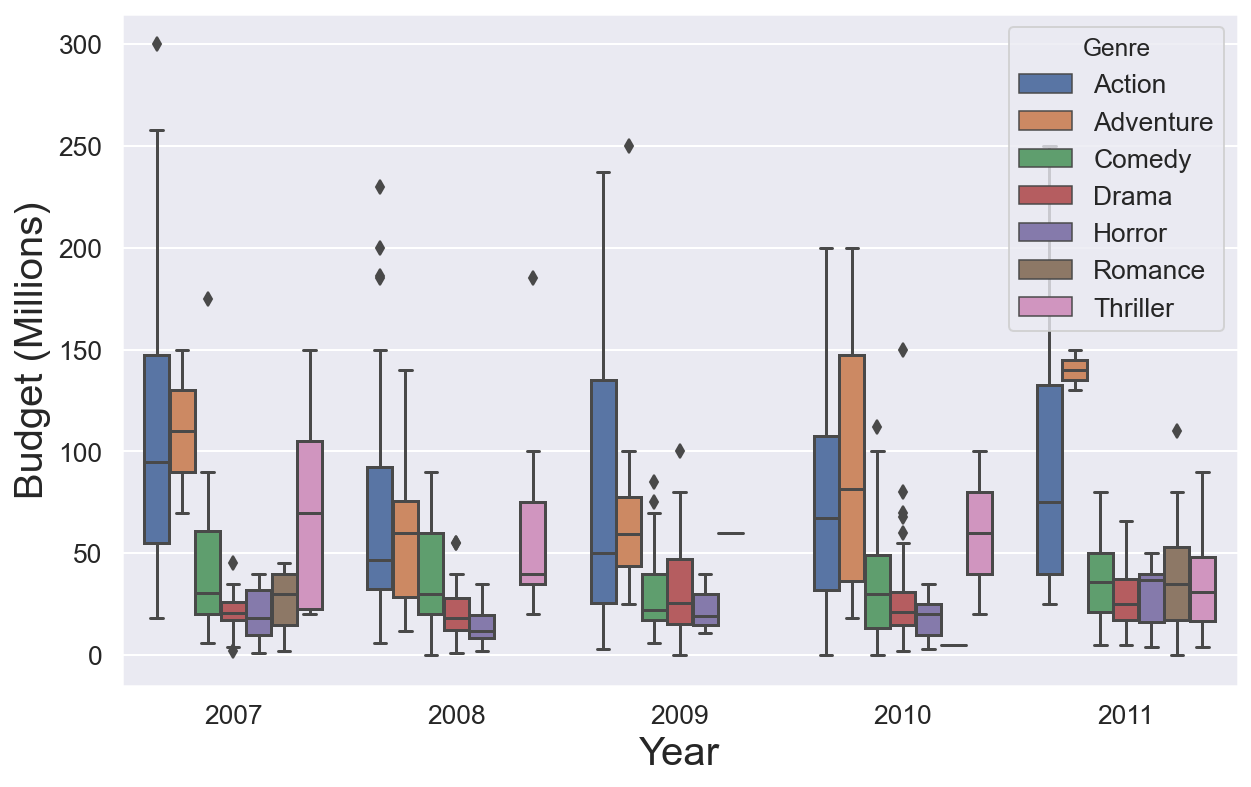

In [51]:
plt.figure(1, figsize = (10, 10/1.6180))
box3 = sns.boxplot(data = data, x = 'Year_Release', y = 'Budget_Millions', hue = 'Genre')
plt.ylabel('Budget (Millions)', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

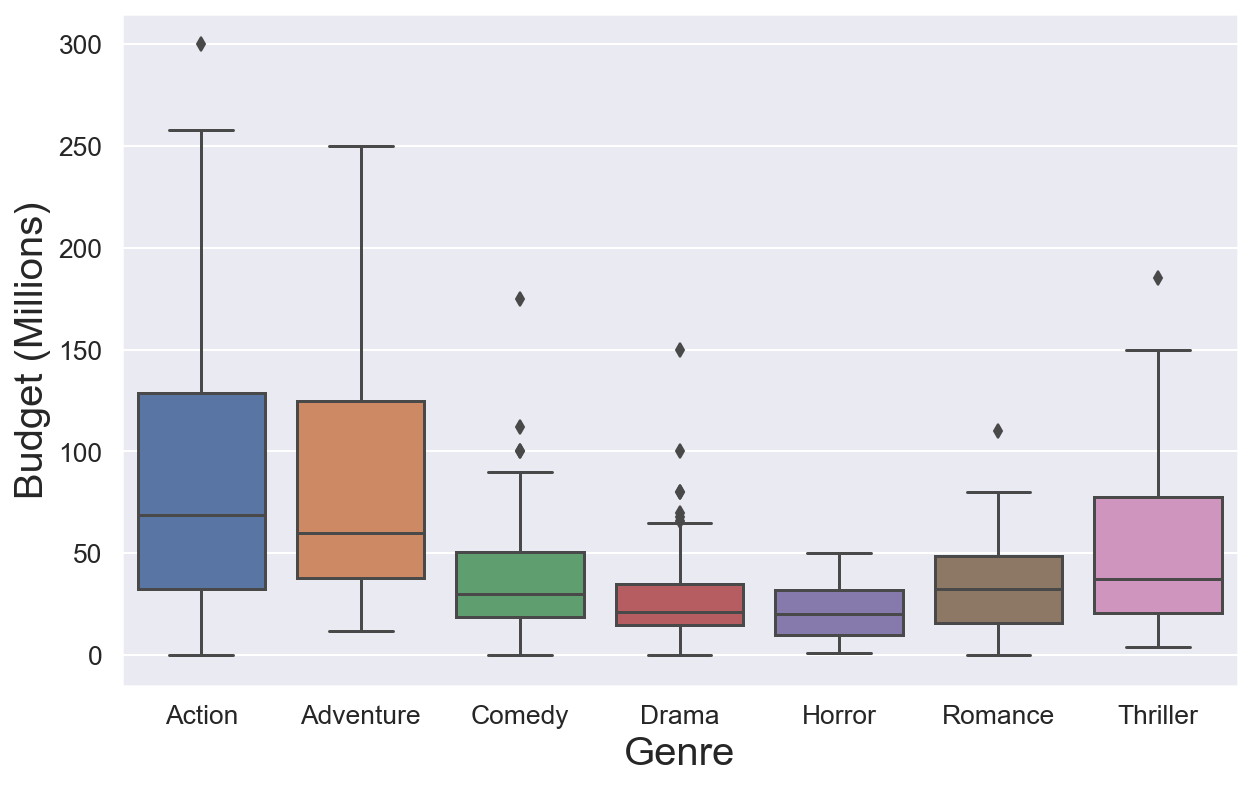

In [52]:
plt.figure(1, figsize = (10, 10/1.6180))
box3 = sns.boxplot(data = data, x = 'Genre', y = 'Budget_Millions')
plt.ylabel('Budget (Millions)', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.show()

#### Notice that in the last two plots it's shown some points that can be cosidered as outiers present in the dataset (since they're all outside the quartile's range)

#### Violin plot

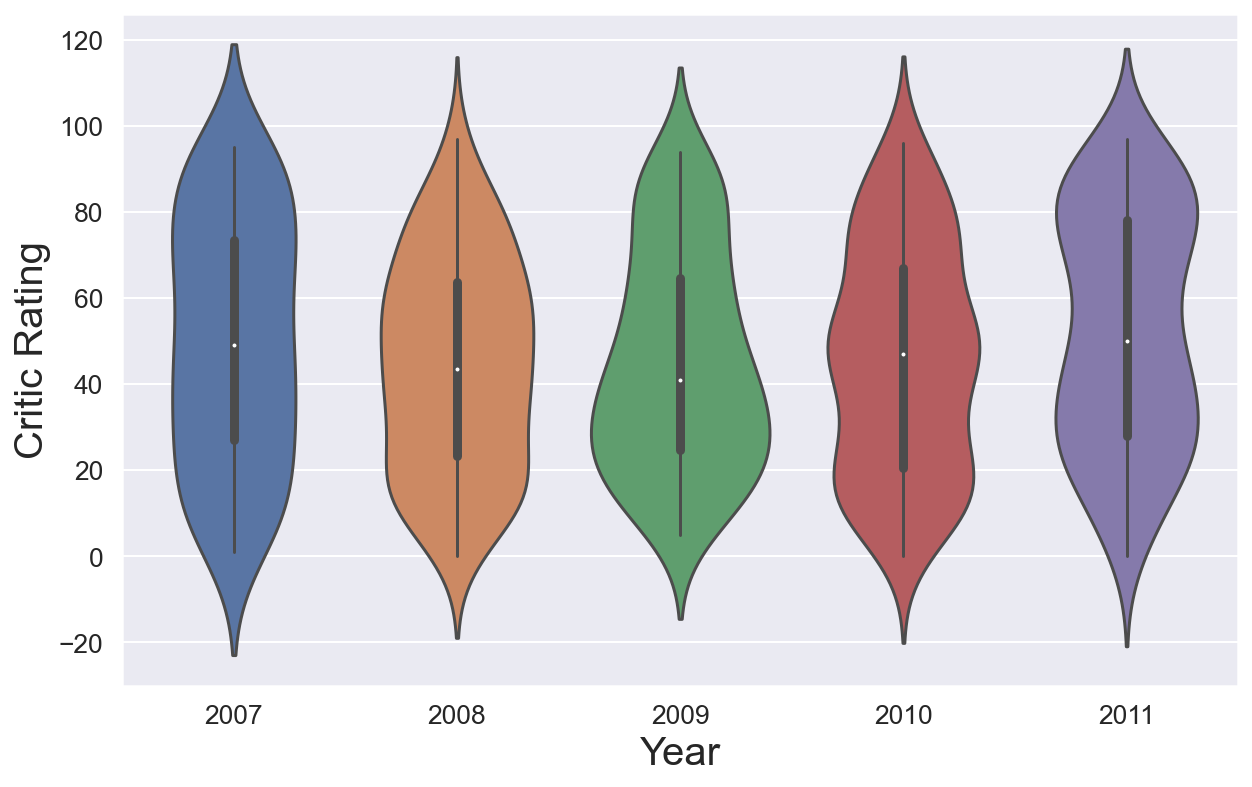

In [53]:
plt.figure(1, figsize = (10, 10/1.6180))
vio1 = sns.violinplot(data = data, x = 'Year_Release', y = 'Critic_Rating')
plt.ylabel('Critic Rating', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

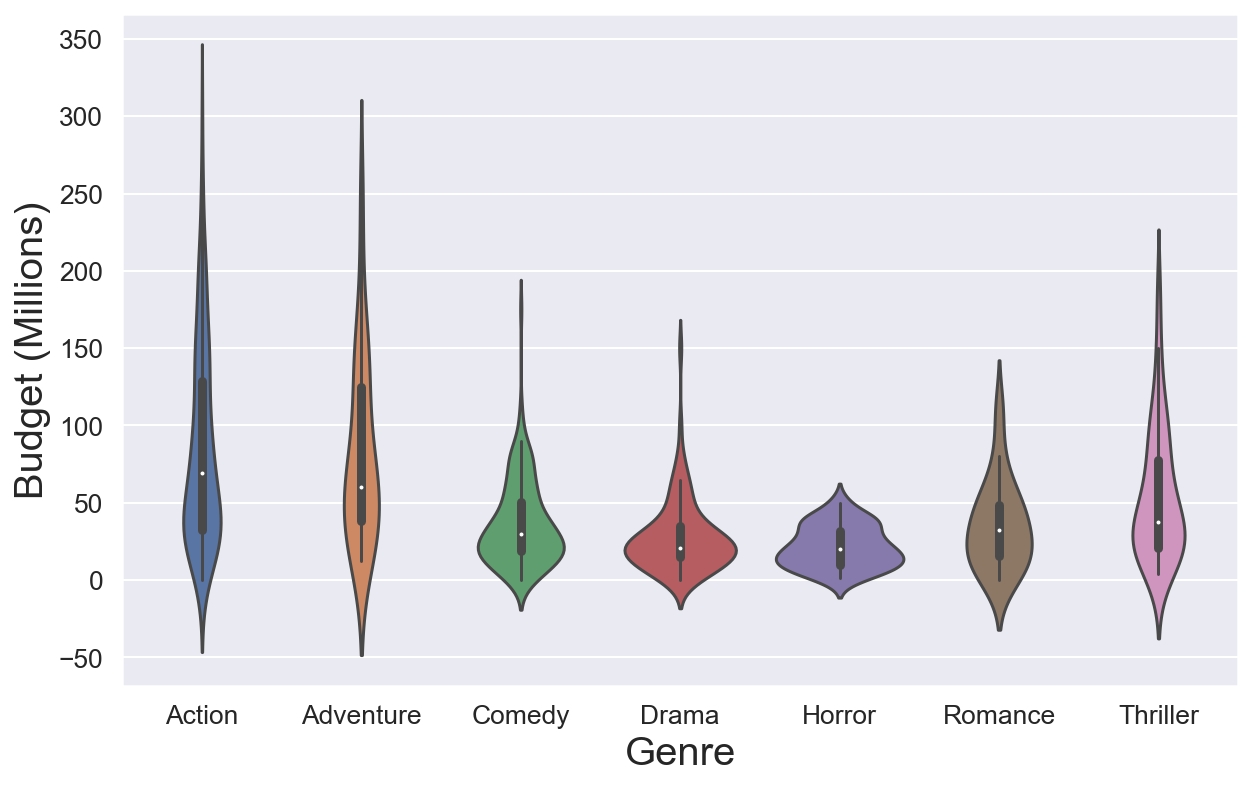

In [54]:
plt.figure(1, figsize = (10, 10/1.6180))
vio1 = sns.violinplot(data = data, x = 'Genre', y = 'Budget_Millions')
plt.ylabel('Budget (Millions)', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.show()

#### Strip plot

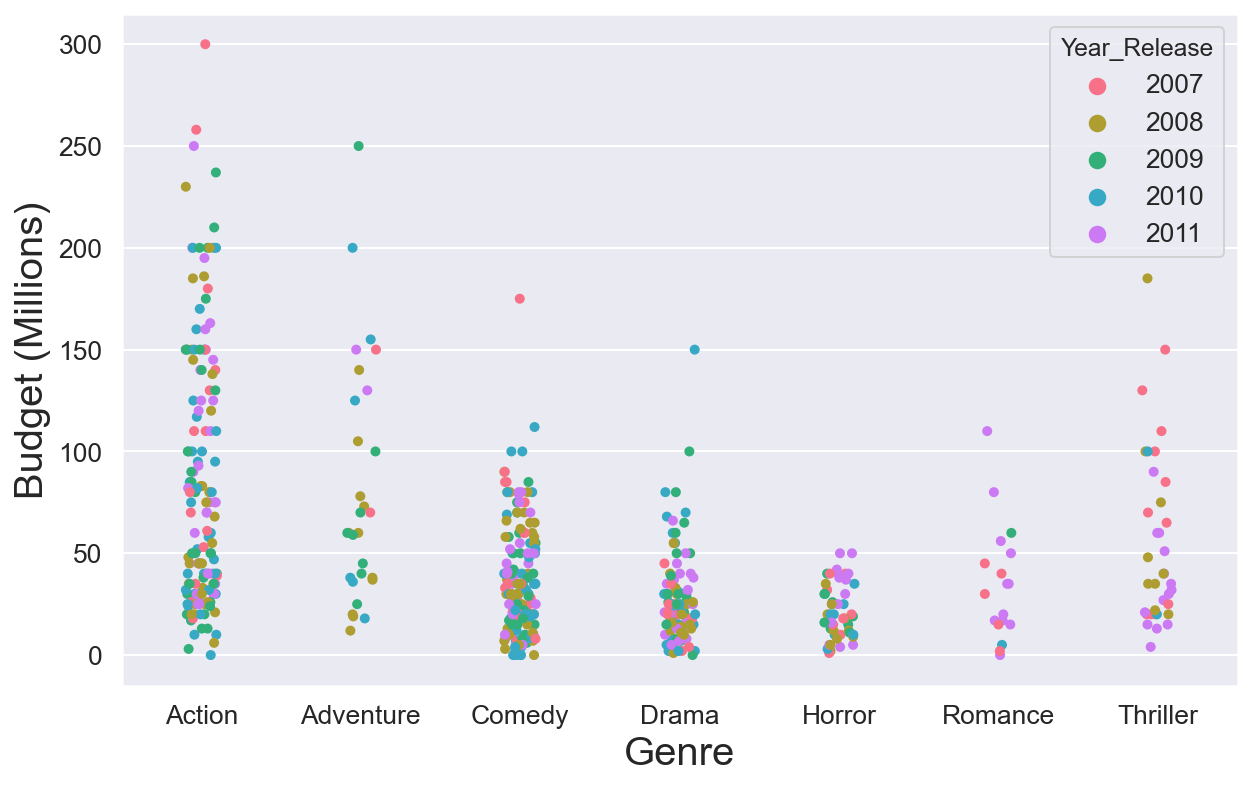

In [55]:
plt.figure(1, figsize = (10, 10/1.6180))
sns.stripplot(x = "Genre", y = "Budget_Millions", data = data, palette = "husl", hue = 'Year_Release');
plt.ylabel('Budget (Millions)', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.show()

#### Swarm plot

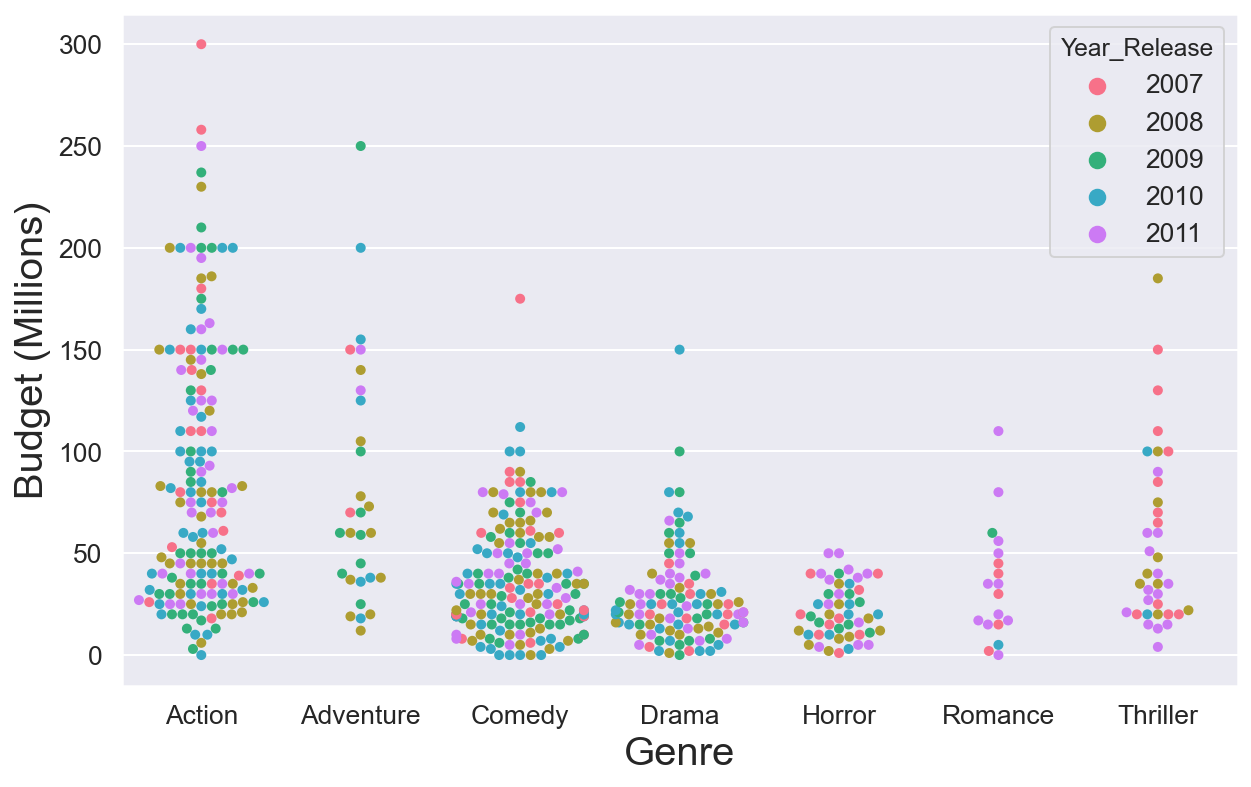

In [56]:
plt.figure(1, figsize = (10, 10/1.6180))
sns.swarmplot(x = "Genre", y = "Budget_Millions", data = data, palette = "husl", hue = 'Year_Release');
plt.ylabel('Budget (Millions)', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.show()

#### Combining plots

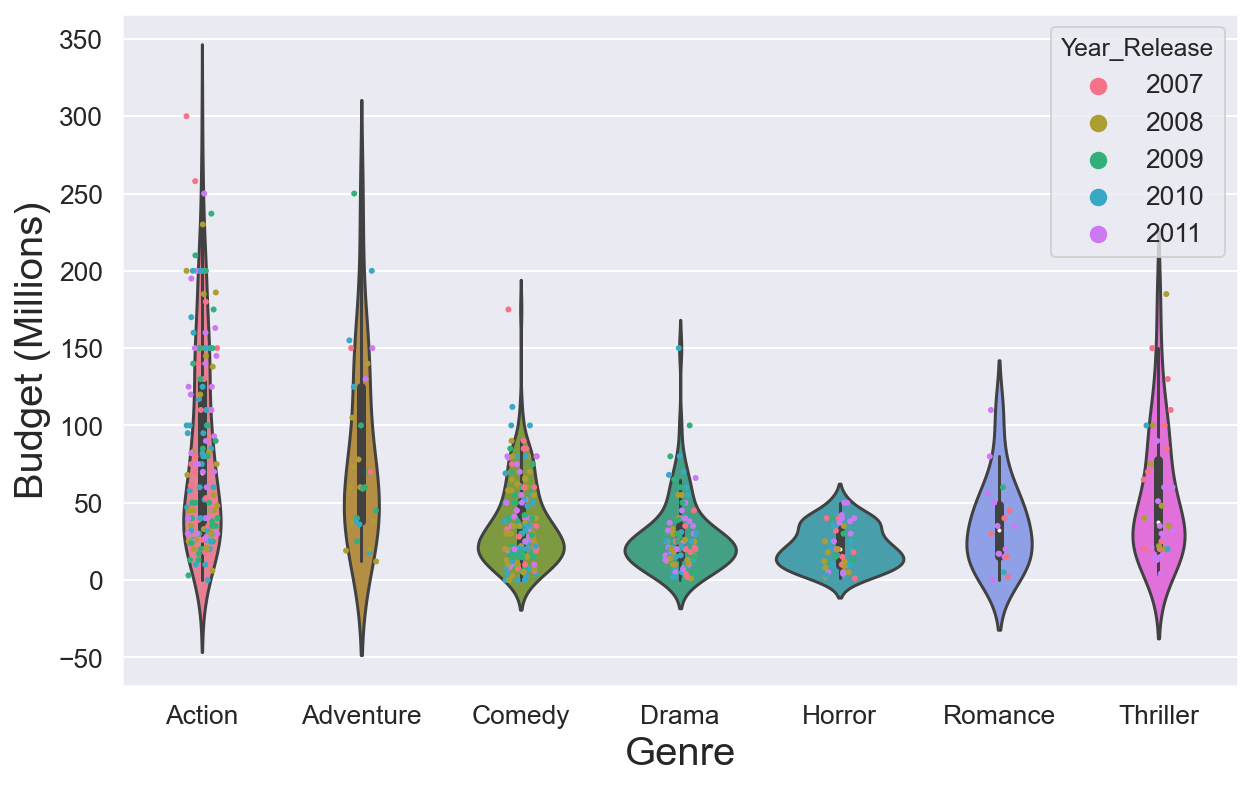

In [57]:
plt.figure(1, figsize = (10, 10/1.6180))
sns.violinplot(x = "Genre", y = "Budget_Millions", palette = "husl", data = data);
sns.stripplot(x = "Genre", y = "Budget_Millions", 
              palette = "husl", size = 3, hue = 'Year_Release', data = data)
plt.ylabel('Budget (Millions)', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.show()

### Working with filters

In [58]:
filter1 = data.Genre == 'Action'
filter2 = data.Genre == 'Adventure'
filter3 = data.Genre == 'Comedy'
filter4 = data.Genre == 'Drama'
filter5 = data.Genre == 'Horror'
filter6 = data.Genre == 'Romance'
filter7 = data.Genre == 'Thriller'

In [59]:
df_action = data[filter1]
df_action

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
2,12 Rounds,Action,30,52,20,2009
5,2012,Action,39,63,200,2009
15,Abduction,Action,4,46,35,2011
29,Appaloosa,Action,77,55,20,2008
30,Armored,Action,40,34,20,2009
...,...,...,...,...,...,...
531,Watchmen,Action,64,68,130,2009
542,Whiteout,Action,7,28,35,2009
546,X-Men Origins: Wolverine,Action,37,72,150,2009
547,X-Men: First Class,Action,87,88,160,2011


In [60]:
df_adventure = data[filter2]
df_adventure

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
1,"10,000 B.C.",Adventure,9,44,105,2008
3,127 Hours,Adventure,93,84,18,2010
19,Alice in Wonderland,Adventure,52,72,200,2010
21,Aliens in the Attic,Adventure,30,46,45,2009
24,Amelia,Adventure,21,35,40,2009
32,Australia,Adventure,55,69,78,2008
46,Beverly Hills Chihuahua,Adventure,41,56,20,2008
65,City of Ember,Adventure,52,48,38,2008
68,College Road Trip,Adventure,13,56,140,2008
130,Fool's Gold,Adventure,11,53,73,2008


In [61]:
df_comedy = data[filter3]
df_comedy

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
0,(500) Days of Summer,Comedy,87,81,8,2009
4,17 Again,Comedy,55,70,20,2009
6,27 Dresses,Comedy,40,71,30,2008
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011
...,...,...,...,...,...,...
552,You Don't Mess with the Zohan,Comedy,36,50,80,2008
553,You Will Meet a Tall Dark Stranger,Comedy,43,35,22,2010
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009


In [62]:
df_drama = data[filter4]
df_drama

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010
...,...,...,...,...,...,...
529,War Horse,Drama,77,73,66,2011
532,Water For Elephants,Drama,60,72,38,2011
534,We Own the Night,Drama,55,63,21,2007
541,Whip It,Drama,84,73,15,2009


In [63]:
df_horror = data[filter5]
df_horror

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
7,30 Days of Night,Horror,50,57,32,2007
12,A Nightmare on Elm Street,Horror,13,40,35,2010
20,Alien vs. Predator -- Requiem,Horror,14,37,40,2007
28,Apollo 18,Horror,23,31,5,2011
59,Case 39,Horror,23,42,26,2009
88,Devil,Horror,52,45,10,2010
97,Don't Be Afraid Of The Dark,Horror,59,37,25,2010
100,Drag Me to Hell,Horror,92,61,30,2009
103,Dream House,Horror,7,38,50,2011
109,Dylan Dog: Dead of Night,Horror,6,28,20,2010


In [64]:
df_romance = data[filter6]
df_romance

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
16,Across the Universe,Romance,54,84,45,2007
42,Beastly,Romance,19,50,17,2011
78,"Crazy, Stupid, Love",Romance,78,81,50,2011
108,Duplicity,Romance,64,38,60,2009
136,Friends With Benefits,Romance,71,68,35,2011
201,Jane Eyre,Romance,85,77,0,2011
208,Just Go With It,Romance,19,63,80,2011
244,Midnight in Paris,Romance,93,84,17,2011
250,Monte Carlo,Romance,38,50,20,2011
255,Music and Lyrics,Romance,63,70,40,2007


In [65]:
df_thriller = data[filter7]
df_thriller

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Millions,Year_Release
25,American Gangster,Thriller,79,87,100,2007
72,Contagion,Thriller,84,63,60,2011
95,Disturbia,Thriller,67,75,20,2007
105,Drive,Thriller,93,79,15,2011
179,I Am Legend,Thriller,69,69,150,2007
180,I Am Number Four,Thriller,32,57,60,2011
189,In Time,Thriller,38,55,40,2011
225,Limitless,Thriller,69,73,27,2011
237,Margin Call,Thriller,86,73,4,2011
243,Michael Clayton,Thriller,90,72,25,2007


---

In [66]:
df2_action = df_action.groupby('Year_Release')['Budget_Millions'].mean()\
.reset_index().sort_values(['Year_Release'], ascending = True)

Genre = []
for i in range(len(df2_action)):
    Genre.append('Action')
df2_action['Genre'] = Genre
df2_action.columns = ['Year', 'Mean_Budget_Millions', 'Genre']
df2_action

,Year,Mean_Budget_Millions,Genre
0,2007,110.277778,Action
1,2008,75.843750,Action
2,2009,77.885714,Action
3,2010,79.736842,Action
4,2011,92.419355,Action


In [67]:
df2_adventure = df_adventure.groupby('Year_Release')['Budget_Millions'].mean()\
.reset_index().sort_values(['Year_Release'], ascending = True)

Genre = []
for i in range(len(df2_adventure)):
    Genre.append('Adventure')
df2_adventure['Genre'] = Genre
df2_adventure.columns = ['Year', 'Mean_Budget_Millions', 'Genre']
df2_adventure

,Year,Mean_Budget_Millions,Genre
0,2007,110.000000,Adventure
1,2008,58.363636,Adventure
2,2009,81.125000,Adventure
3,2010,95.333333,Adventure
4,2011,140.000000,Adventure


In [68]:
df2_comedy = df_comedy.groupby('Year_Release')['Budget_Millions'].mean()\
.reset_index().sort_values(['Year_Release'], ascending = True)

Genre = []
for i in range(len(df2_comedy)):
    Genre.append('Comedy')
df2_comedy['Genre'] = Genre
df2_comedy.columns = ['Year', 'Mean_Budget_Millions', 'Genre']
df2_comedy

,Year,Mean_Budget_Millions,Genre
0,2007,45.136364,Comedy
1,2008,37.121951,Comedy
2,2009,30.390244,Comedy
3,2010,34.051282,Comedy
4,2011,38.689655,Comedy


In [69]:
df2_drama = df_drama.groupby('Year_Release')['Budget_Millions'].mean()\
.reset_index().sort_values(['Year_Release'], ascending = True)

Genre = []
for i in range(len(df2_drama)):
    Genre.append('Drama')
df2_drama['Genre'] = Genre
df2_drama.columns = ['Year', 'Mean_Budget_Millions', 'Genre']
df2_drama

,Year,Mean_Budget_Millions,Genre
0,2007,21.666667,Drama
1,2008,22.578947,Drama
2,2009,31.818182,Drama
3,2010,31.760000,Drama
4,2011,27.391304,Drama


In [70]:
df2_horror = df_horror.groupby('Year_Release')['Budget_Millions'].mean()\
.reset_index().sort_values(['Year_Release'], ascending = True)

Genre = []
for i in range(len(df2_horror)):
    Genre.append('Horror')
df2_horror['Genre'] = Genre
df2_horror.columns = ['Year', 'Mean_Budget_Millions', 'Genre']
df2_horror

,Year,Mean_Budget_Millions,Genre
0,2007,20.666667,Horror
1,2008,14.600000,Horror
2,2009,22.222222,Horror
3,2010,18.500000,Horror
4,2011,29.384615,Horror


In [71]:
df2_romance = df_romance.groupby('Year_Release')['Budget_Millions'].mean()\
.reset_index().sort_values(['Year_Release'], ascending = True)

Genre = []
for i in range(len(df2_romance)):
    Genre.append('Romance')
df2_romance['Genre'] = Genre
df2_romance.columns = ['Year', 'Mean_Budget_Millions', 'Genre']
df2_romance

,Year,Mean_Budget_Millions,Genre
0,2007,26.400000,Romance
1,2008,NaN,Romance
2,2009,60.000000,Romance
3,2010,5.000000,Romance
4,2011,39.545455,Romance


In [72]:
df2_thriller = df_thriller.groupby('Year_Release')['Budget_Millions'].mean()\
.reset_index().sort_values(['Year_Release'], ascending = True)

Genre = []
for i in range(len(df2_thriller)):
    Genre.append('Thriller')
df2_thriller['Genre'] = Genre
df2_thriller.columns = ['Year', 'Mean_Budget_Millions', 'Genre']
df2_thriller

,Year,Mean_Budget_Millions,Genre
0,2007,72.272727,Thriller
1,2008,62.222222,Thriller
2,2009,NaN,Thriller
3,2010,60.000000,Thriller
4,2011,35.214286,Thriller


In [73]:
df = pd.concat([df2_action, df2_adventure, df2_comedy,
                df2_drama, df2_horror, df2_romance, df2_thriller], 
               axis = 0, ignore_index = True)

In [74]:
df

,Year,Mean_Budget_Millions,Genre
0,2007,110.277778,Action
1,2008,75.843750,Action
2,2009,77.885714,Action
3,2010,79.736842,Action
4,2011,92.419355,Action
5,2007,110.000000,Adventure
6,2008,58.363636,Adventure
7,2009,81.125000,Adventure
8,2010,95.333333,Adventure
9,2011,140.000000,Adventure


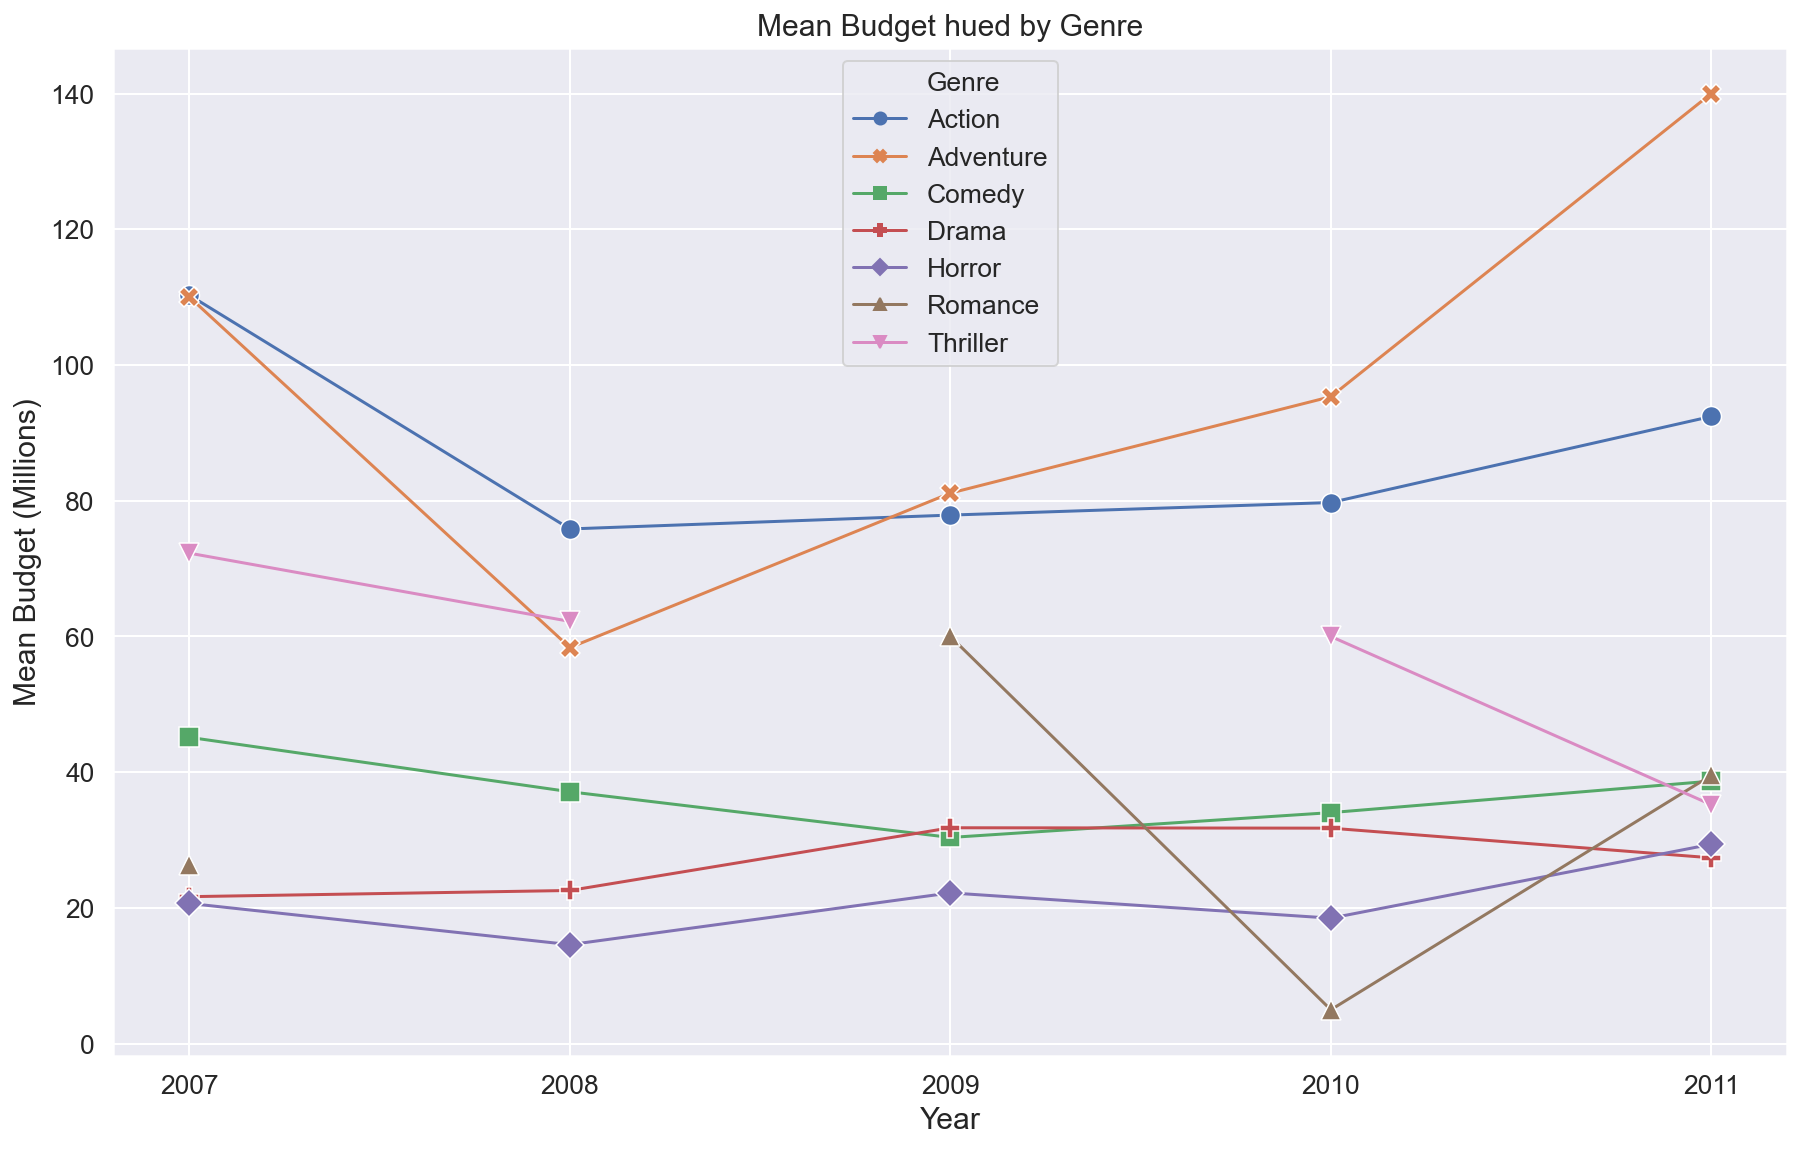

In [112]:
plt.figure(2, figsize = (15, 15/1.6180))

ax = sns.lineplot(x = "Year", y = "Mean_Budget_Millions", data = df, 
                  style = 'Genre', hue = 'Genre',
                  markers = True, dashes = False, markersize = 10)
plt.xlabel('Year', fontsize = 15)
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.ylabel('Mean Budget (Millions)', fontsize = 15)
plt.title('Mean Budget hued by Genre', fontsize = 15)
#ax.set(xlabel = 'Year', ylabel = 'Mean Sentiment')
#plt.savefig('Mean Sentiment hued by Location per year.png')
plt.show()

#### Let's substitute NA's by mean values

In [76]:
df2_romance = df2_romance.fillna(df2_romance.mean(), axis = 0)
df2_romance

,Year,Mean_Budget_Millions,Genre
0,2007,26.400000,Romance
1,2008,32.736364,Romance
2,2009,60.000000,Romance
3,2010,5.000000,Romance
4,2011,39.545455,Romance


In [77]:
df2_thriller = df2_thriller.fillna(df2_thriller.mean(), axis = 0)
df2_thriller

,Year,Mean_Budget_Millions,Genre
0,2007,72.272727,Thriller
1,2008,62.222222,Thriller
2,2009,57.427309,Thriller
3,2010,60.000000,Thriller
4,2011,35.214286,Thriller


In [78]:
df2 = pd.concat([df2_action, df2_adventure, df2_comedy,
                df2_drama, df2_horror, df2_romance, df2_thriller], 
               axis = 0, ignore_index = True)

In [79]:
df2

,Year,Mean_Budget_Millions,Genre
0,2007,110.277778,Action
1,2008,75.843750,Action
2,2009,77.885714,Action
3,2010,79.736842,Action
4,2011,92.419355,Action
5,2007,110.000000,Adventure
6,2008,58.363636,Adventure
7,2009,81.125000,Adventure
8,2010,95.333333,Adventure
9,2011,140.000000,Adventure


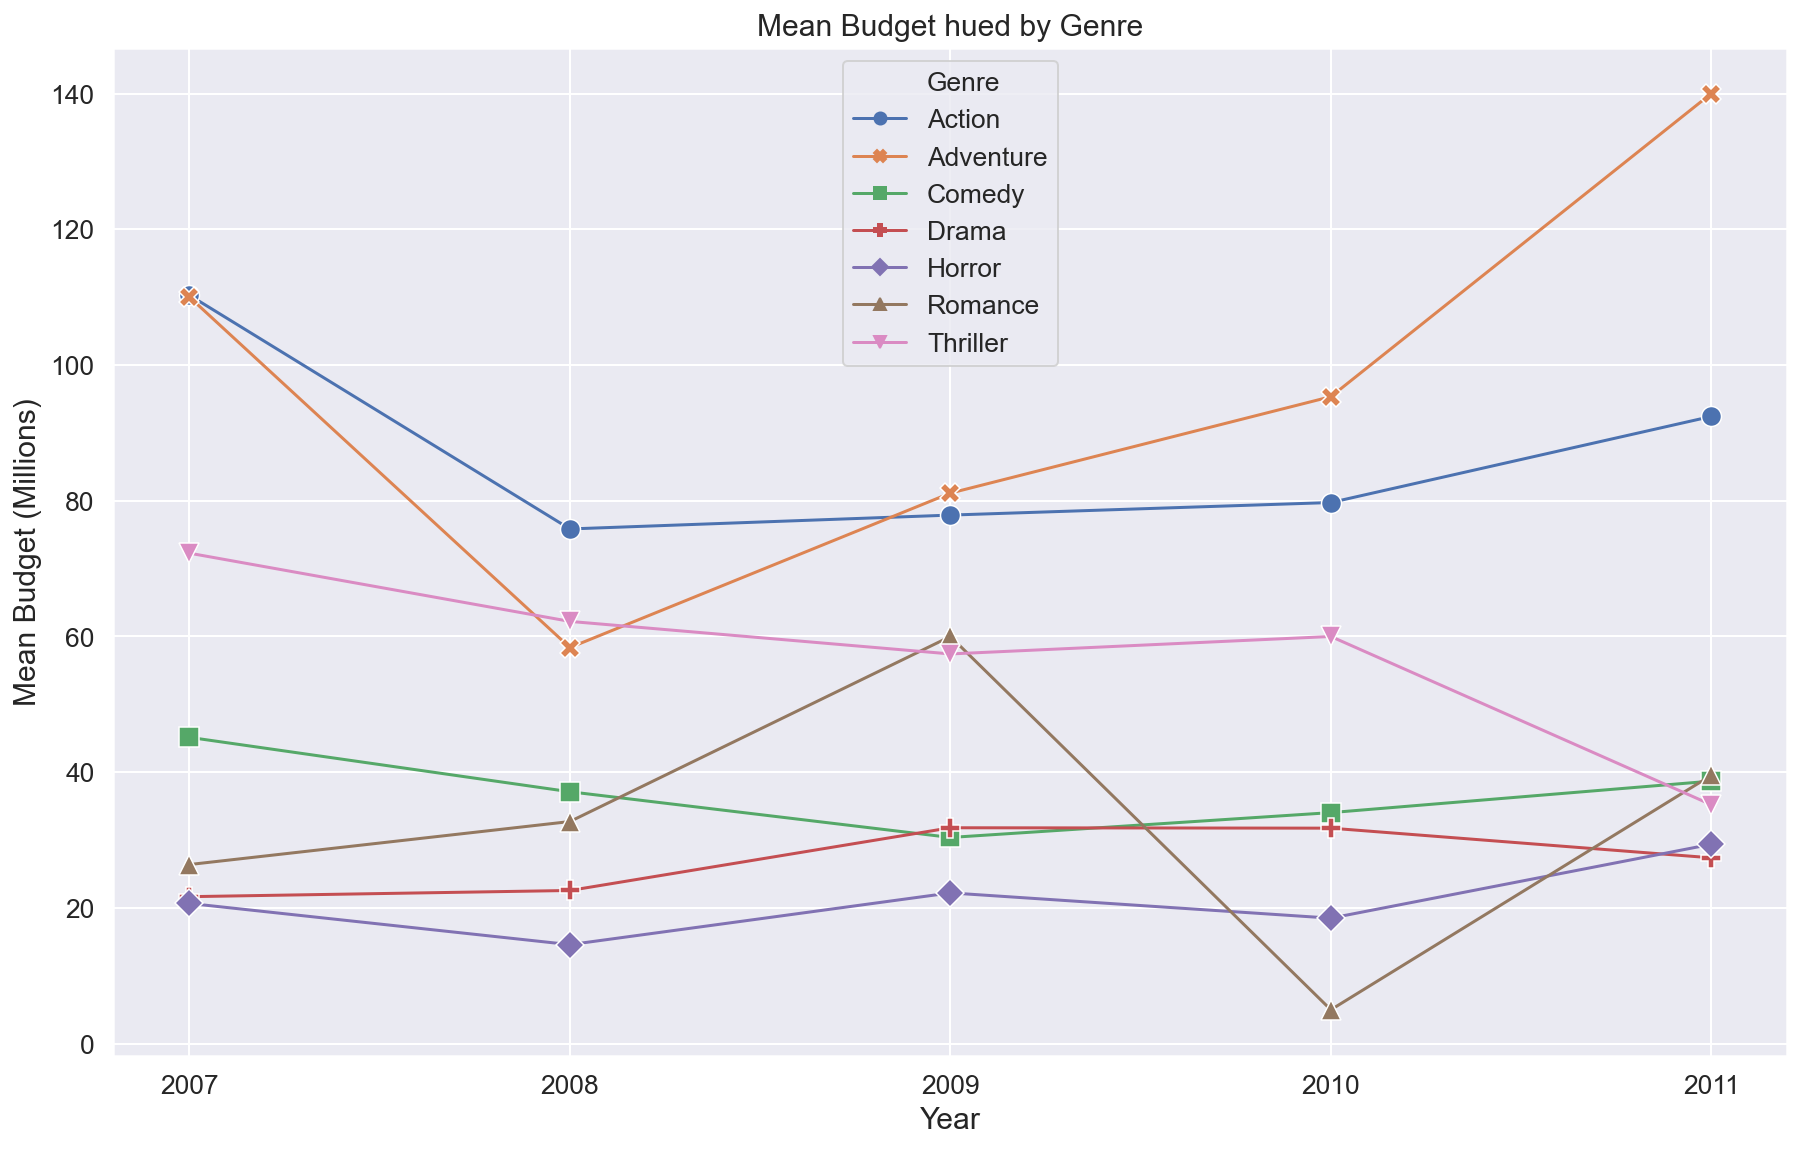

In [111]:
plt.figure(2, figsize = (15, 15/1.6180))

ax = sns.lineplot(x = "Year", y = "Mean_Budget_Millions", data = df2, 
                  style = 'Genre', hue = 'Genre',
                  markers = True, dashes = False, markersize = 10)
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Mean Budget (Millions)', fontsize = 15)
plt.title('Mean Budget hued by Genre', fontsize = 15)
#ax.set(xlabel = 'Year', ylabel = 'Mean Sentiment')
#plt.savefig('Mean Budget Location per year.png')
plt.show()

## Exporting data to file
### Let's export the last dataframe to a csv file 

In [81]:
df2.to_csv('MR_MeanBudgetYear-HuedGenre.csv', index = False)

In [82]:
data = pd.read_csv('MR_MeanBudgetYear-HuedGenre.csv')
data

,Year,Mean_Budget_Millions,Genre
0,2007,110.277778,Action
1,2008,75.843750,Action
2,2009,77.885714,Action
3,2010,79.736842,Action
4,2011,92.419355,Action
5,2007,110.000000,Adventure
6,2008,58.363636,Adventure
7,2009,81.125000,Adventure
8,2010,95.333333,Adventure
9,2011,140.000000,Adventure
